# Big Reports (AKKA) vs Old Reports Performance Test Comparison

## Read Data

In [221]:
import pandas as pd
import numpy as np
import pylab as P
import matplotlib as mp
import matplotlib.pyplot as plt

%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 10)
pylab.rcParams['figure.figsize'] = (30, 20)
skip_count = 100

#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_off_node_120_v1_test4h\\benchmarkResults.csv")

#akka perf test at bechmark - verification run
#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_15_node_120_v1_test4h_validation\\benchmarkResults.csv")
#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\stat_noakka_v1_test4h_newstorage\\benchmarkResults.csv")

#akka perf test at bechmark - verification run after report storage
#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_15_node_v1_test4h_newstorage_run2\\benchmarkResults.csv")
#data2 = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_two_nodes\\benchmarkResults.csv")
#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_two_nodes_20170724\\benchmarkResults.csv")
#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_two_nodes_20170724_interconnection\\WsReport_round1_Xml_minutePeak120.csv")
#data2 = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_two_nodes_20170724_interconnection2_matching\\WsReport_round1_Xml_minutePeak120.csv")
data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_two_nodes_20170725_interconnection3_matching\\WsReport_round1_Xml_minutePeak120.csv")
data2 = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_two_nodes_20170725_interconnection4_matching\\WsReport_round1_Xml_minutePeak120.csv")


#akka perf test at bechmark
#data2 = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_15_node_120_v1_test4h\\benchmarkResults.csv")

#latvia live perf test run
#data2 = pd.read_csv("C:\\Users\\m.hron\\AppData\\Local\\Packages\\Microsoft.SkypeApp_kzf8qxf38zg5c\\LocalState\\Downloads\\WsReport_round1_Xml_minutePeak120v2.csv")
data.head()

Populating the interactive namespace from numpy and matplotlib


C:\Users\m.hron\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,State,CreditInfoId,ContractCount,Duration,DurationSeconds,StartTime,EndTime,ErrorMessage
0,Ok,58359290,2,00:00:05.2160792,5.216079,07/25/2017 13:45:32,07/25/2017 13:45:37,NaN
1,Ok,896610,1,00:00:05.5011284,5.501128,07/25/2017 13:45:32,07/25/2017 13:45:37,NaN
2,Ok,25403037,3,00:00:04.5604868,4.560487,07/25/2017 13:45:33,07/25/2017 13:45:37,NaN
3,Ok,4197754,4,00:00:04.9153012,4.915301,07/25/2017 13:45:33,07/25/2017 13:45:38,NaN
4,Ok,40371188,5,00:00:04.9068125,4.906813,07/25/2017 13:45:33,07/25/2017 13:45:38,NaN


In [222]:
print("# of errors in the 1st set: ", len([x for x in data["State"] if x != 'Ok']))
print("# of errors in the 2nd set: ", len([x for x in data2["State"] if x != 'Ok']))

print("size of the 1st set ",len(data))
print("size of the 2nd set ",len(data2))

#data2 = data2[data2.DurationSeconds < 20]

# of errors in the 1st set:  53
# of errors in the 2nd set:  15
size of the 1st set  3954
size of the 2nd set  1532


## Compare statistics between data sets

In [223]:
def writeDurations(data1, data2):
    d1 = data1["DurationSeconds"]
    d2 = data2["DurationSeconds"]

    print("mean: ", d1.mean(), " ", d2.mean())
    
    print("max: ", d1.max(), " ", d2.max())
    print("min: ", d1.min(), " ", d2.min())
    print("median: ", d1.median(), " ", d2.median())
    print("80: ", d1.quantile(.8), " ", d2.quantile(.8))
    print("94: ", d1.quantile(.94), " ", d2.quantile(.94))
    print("95: ", d1.quantile(.95), " ", d2.quantile(.95))
    print("98: ", d1.quantile(.98), " ", d2.quantile(.98))
    print("99: ", d1.quantile(.99), " ", d2.quantile(.99))

writeDurations(data[skip_count:], data2[skip_count:])
#writeDurations(data2)


mean:  1.4750446140633104   2.767045654678771
max:  60.0244931   11.4127681
min:  0.0564927   0.0687943
median:  0.6710345500000001   1.7900616
80:  1.26924258   4.553283759999999
94:  3.9147138079999957   7.591514477999998
95:  4.731260729999999   7.858346645000001
98:  6.821558432000001   9.177488124
99:  18.208886064999888   9.678526554000001


## Draw report time distribution to graph

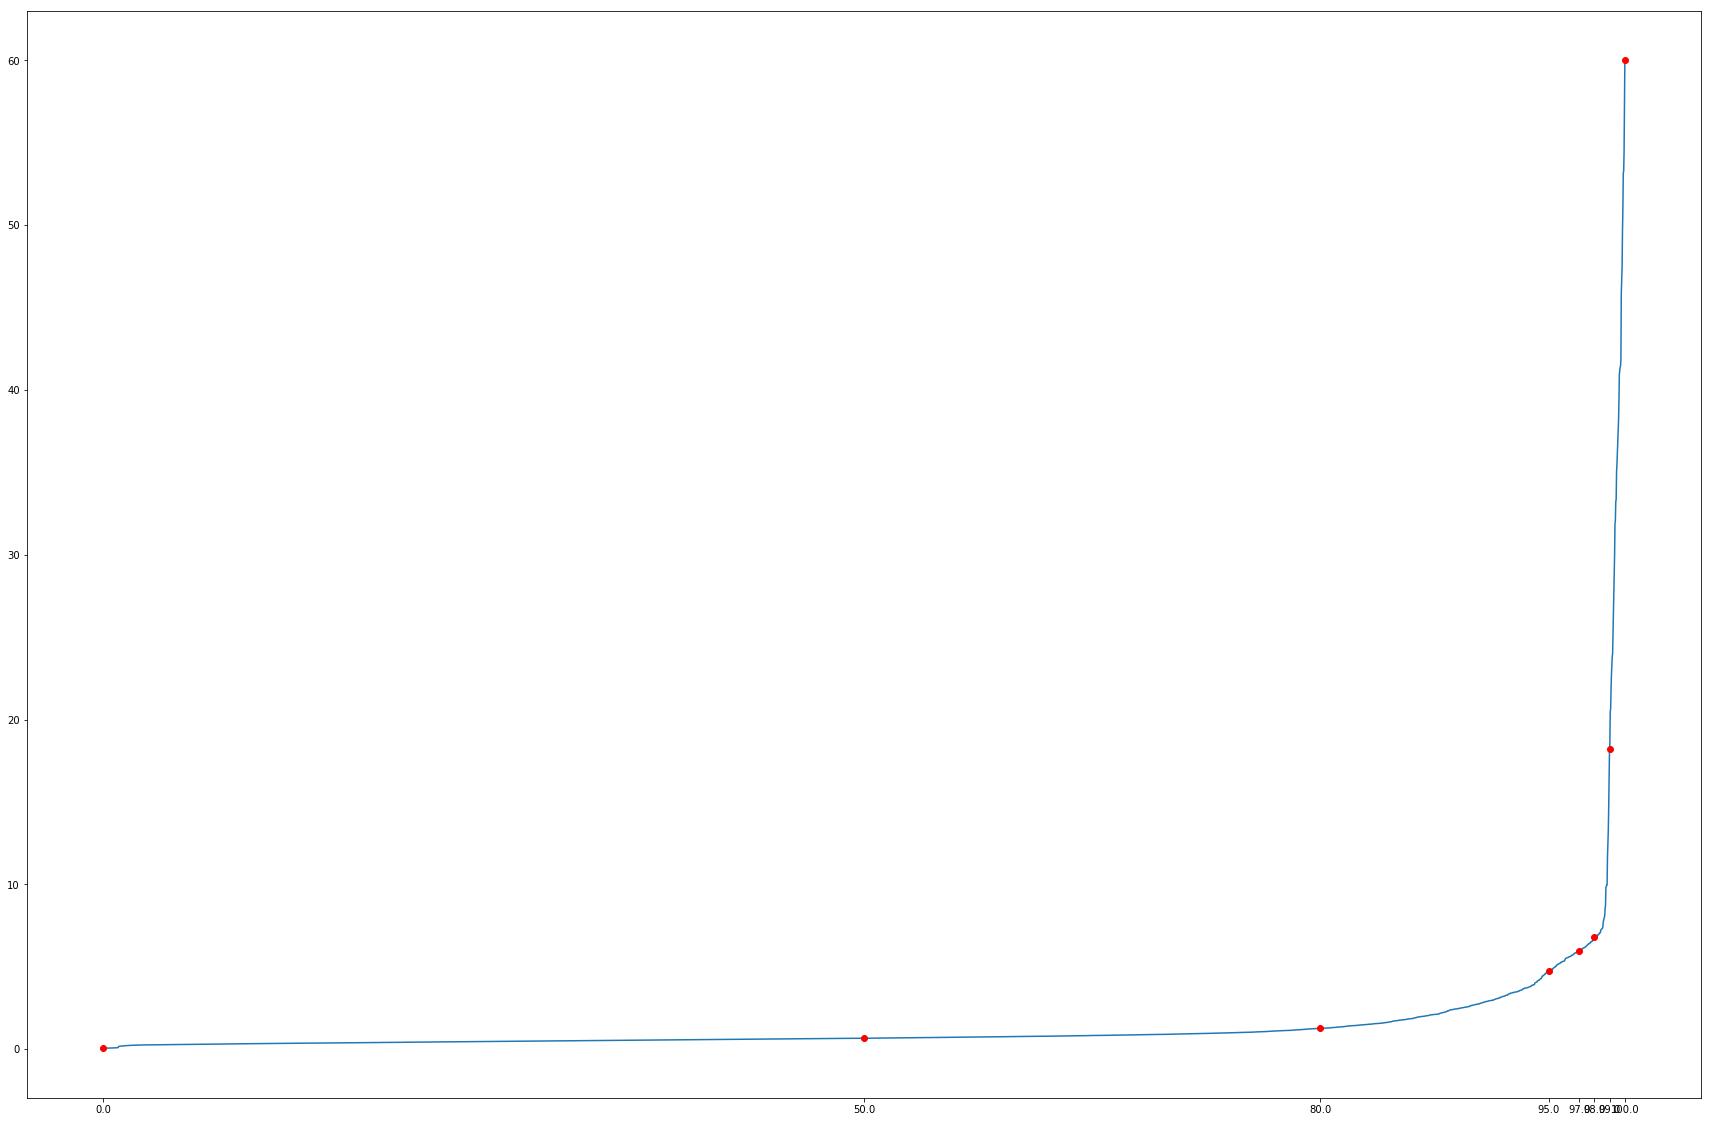

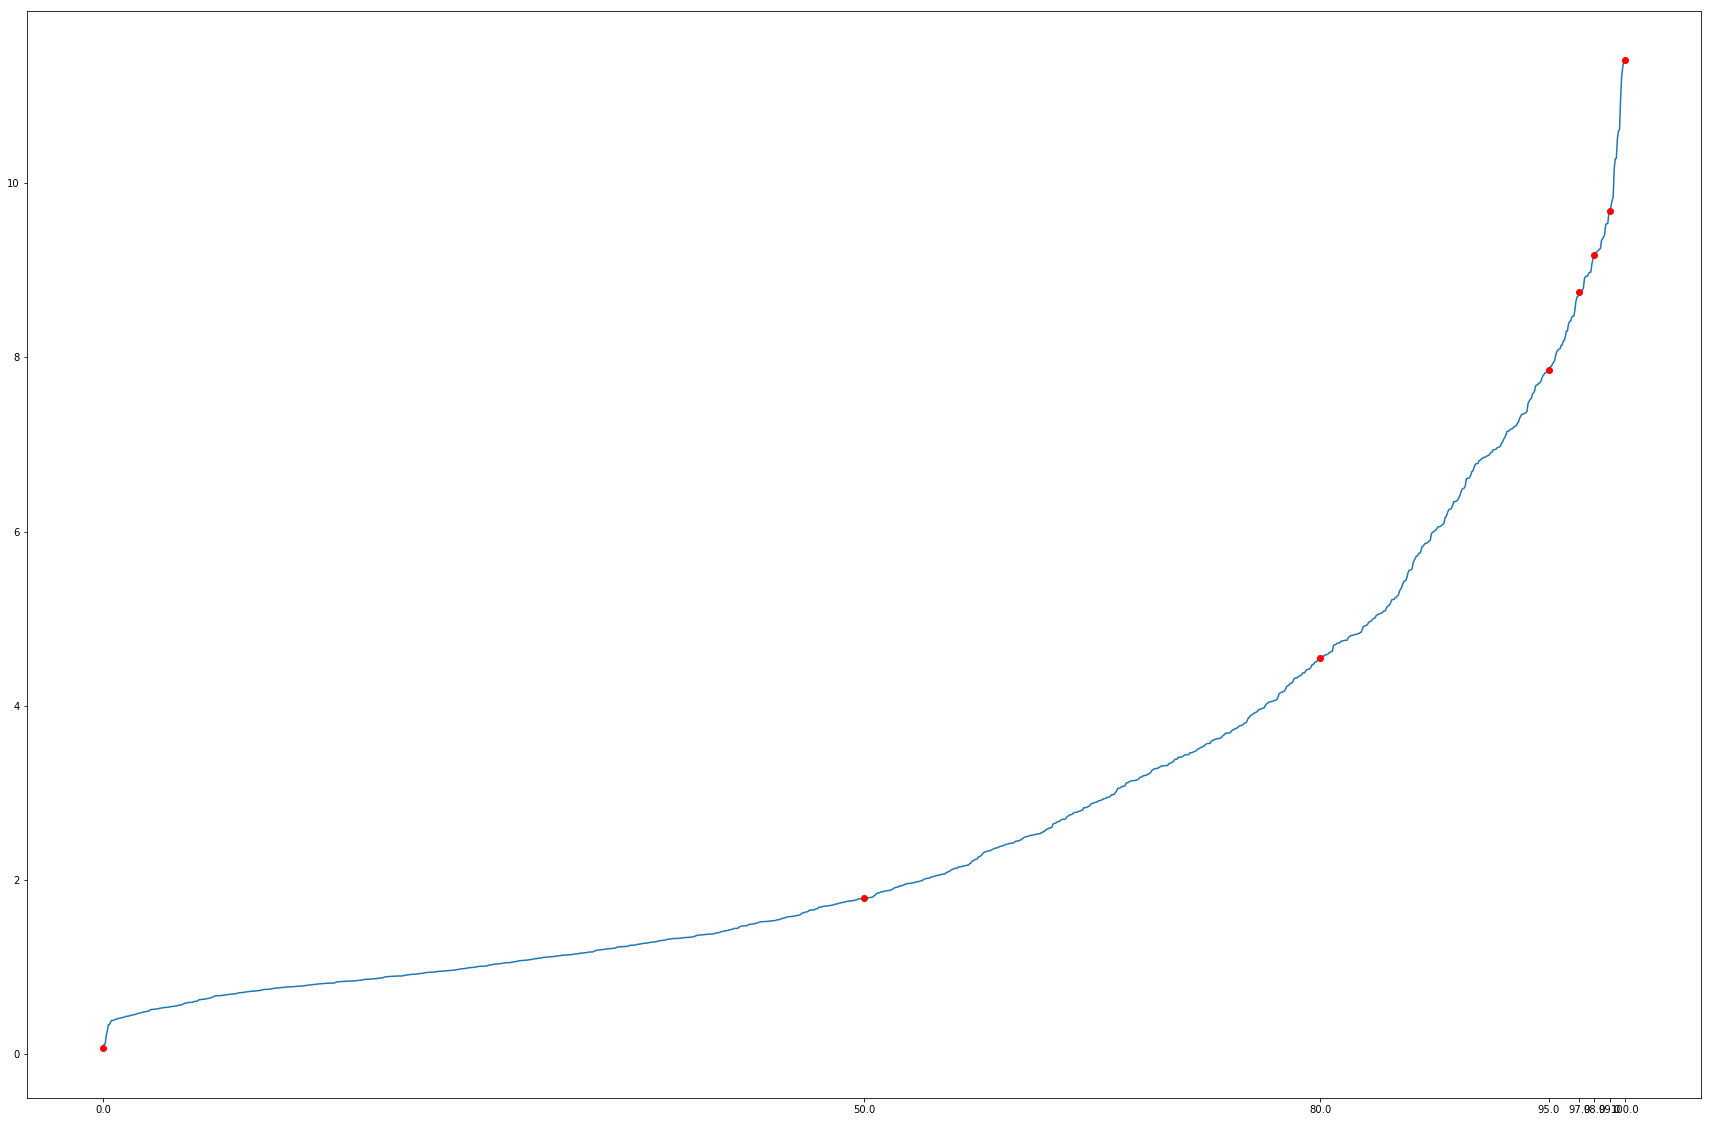

In [224]:
def draw(durations):
    d = np.array(durations)
    d.sort()


    # Percentile values
    p = np.array([0.0, 50.0, 80.0, 95, 97, 98, 99, 100.0])

    perc = mp.mlab.prctile(d, p=p)

    plt.plot(d)
    # Place red dots on the percentiles
    plt.plot((len(d)-1) * p/100., perc, 'ro')

    # Set tick locations and labels
    plt.xticks((len(d)-1) * p/100., map(str, p))

    plt.show()
    
draw(data["DurationSeconds"][skip_count:])
draw(data2["DurationSeconds"][skip_count:])

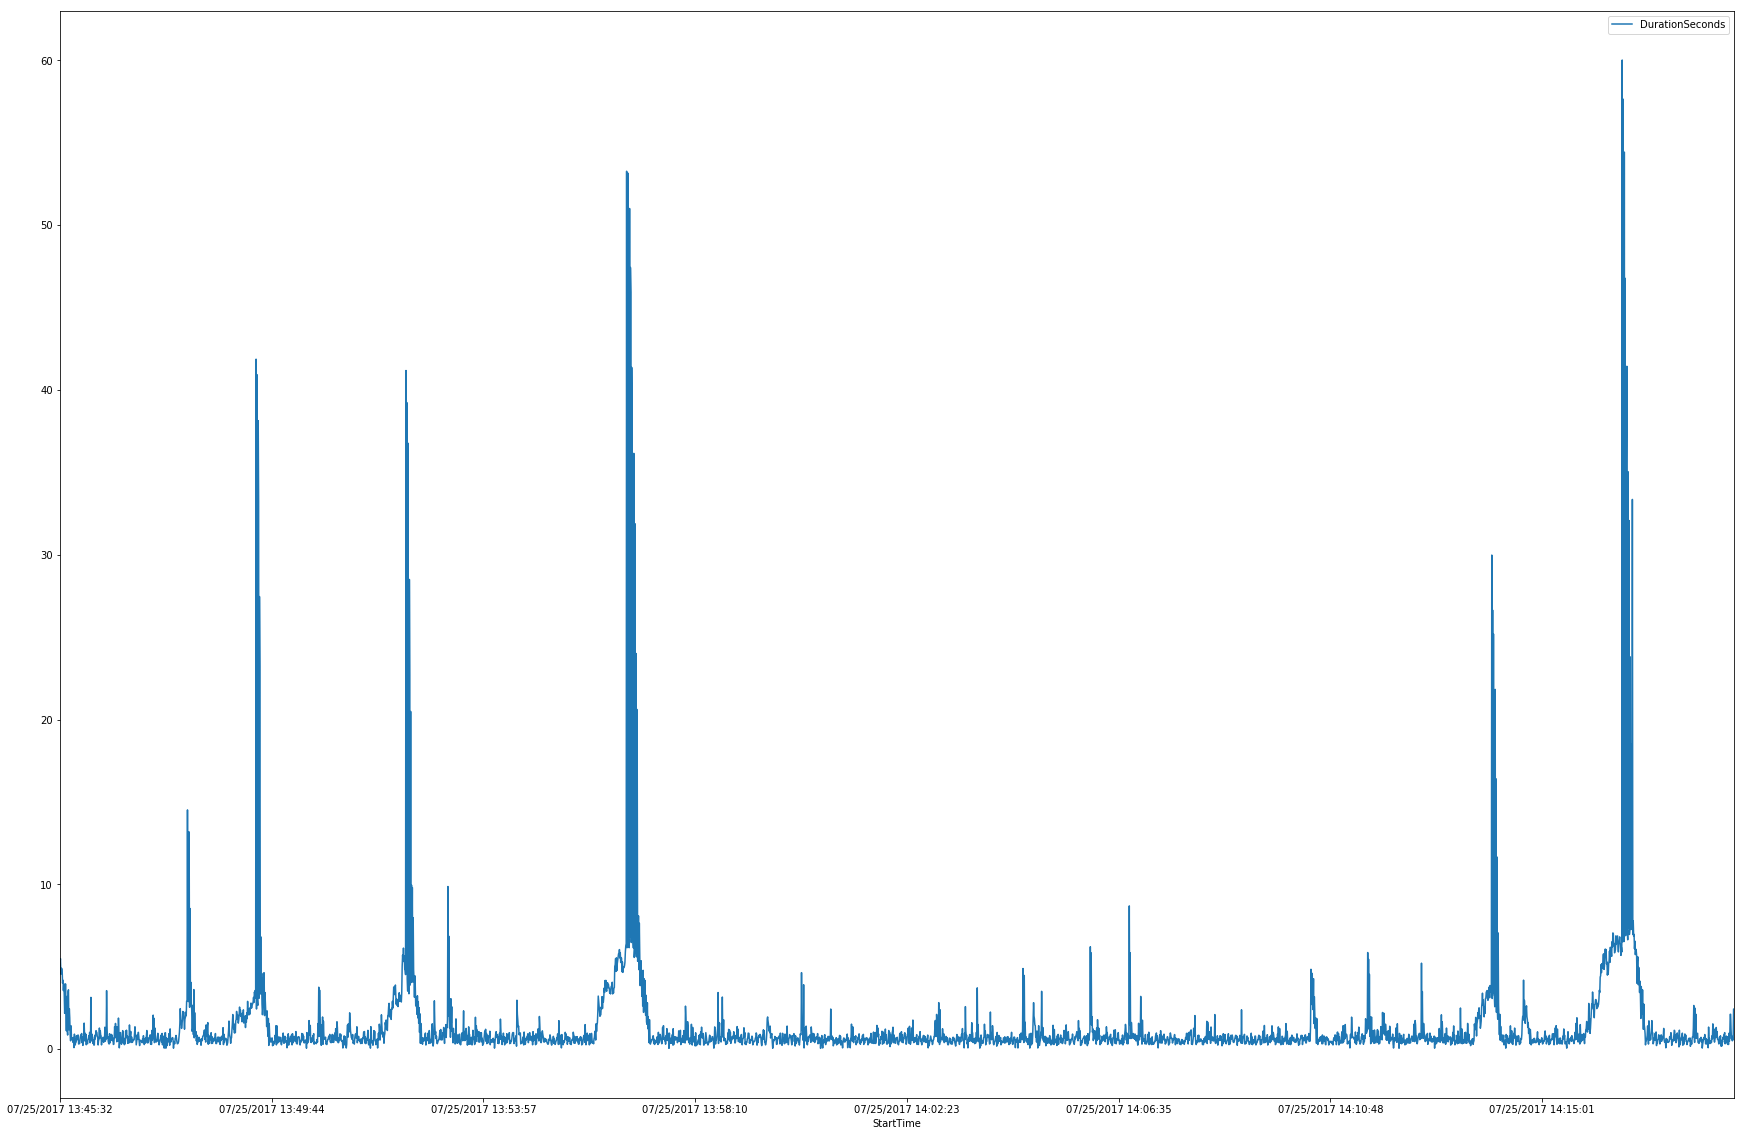

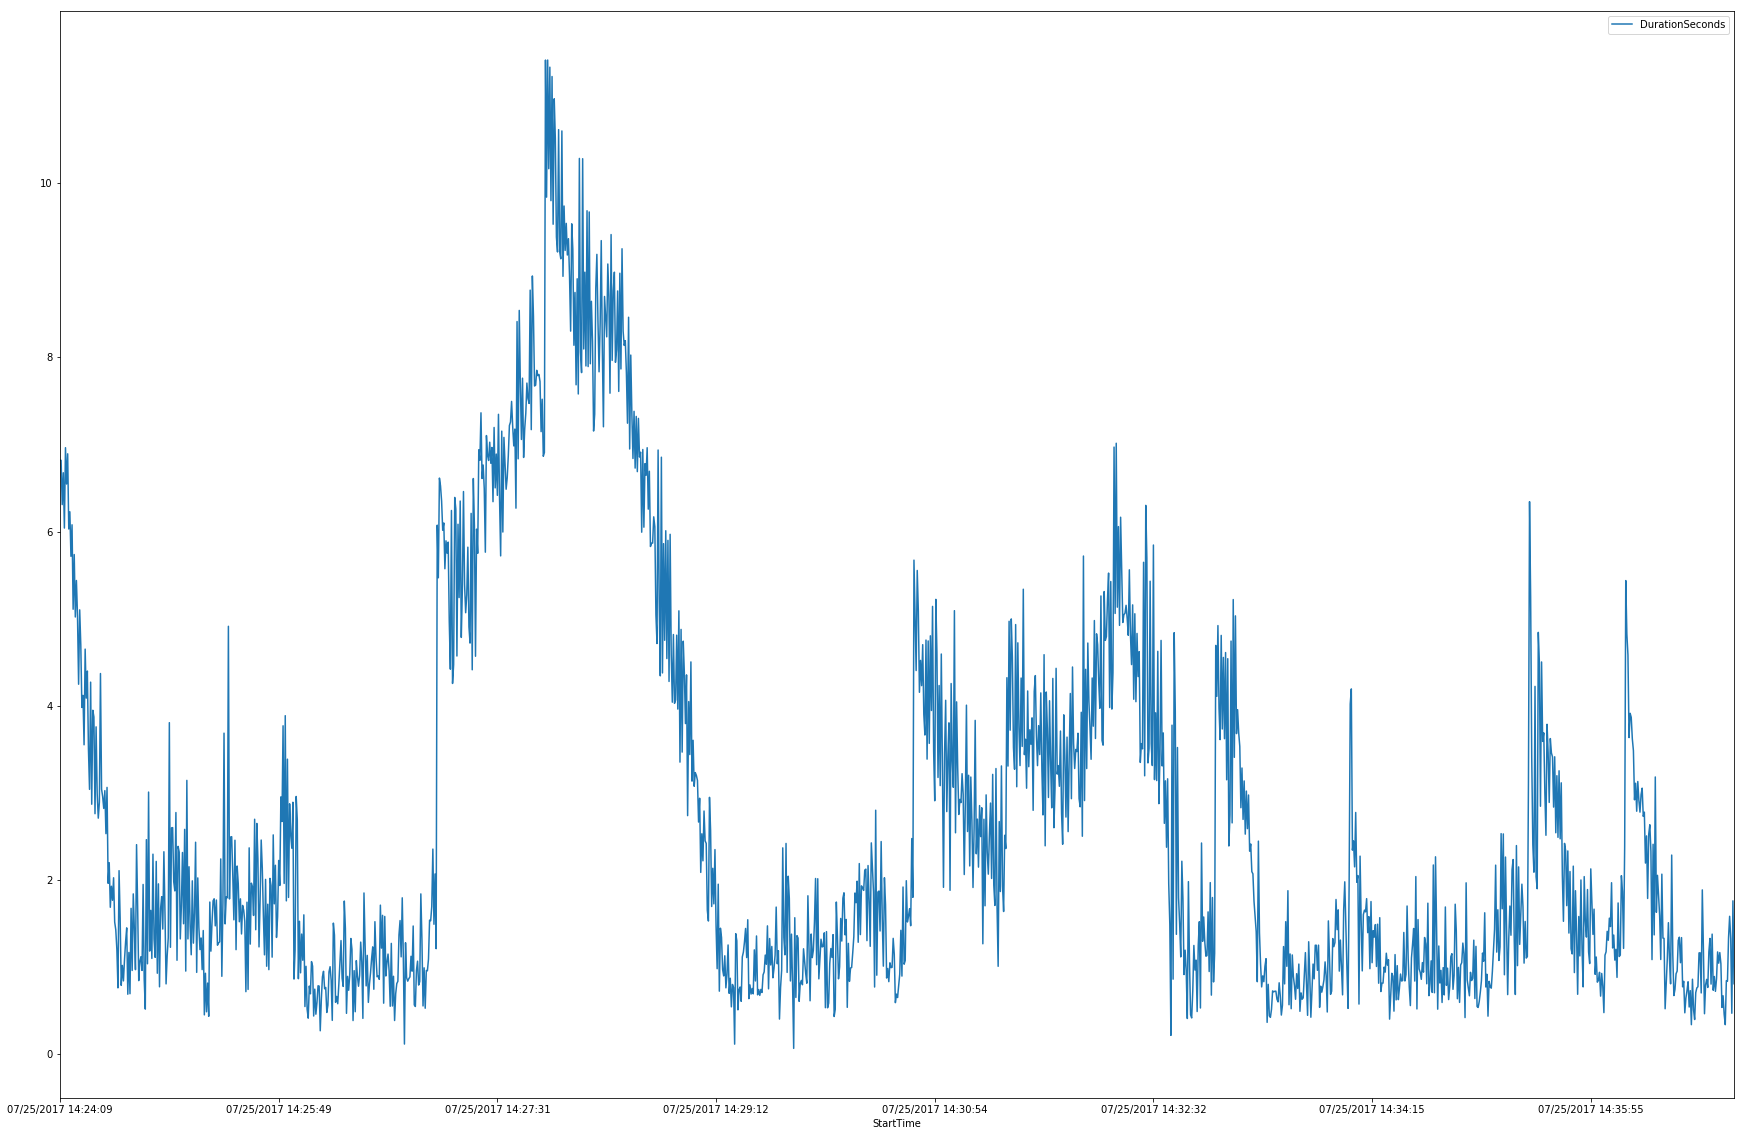

In [225]:
d = data2
d = d.filter(items=['StartTime', 'DurationSeconds'])
d.head()



def plotTimeGraph(d):
    d = d.filter(items=['StartTime', 'DurationSeconds'])
    d.set_index("StartTime", inplace= True)
    d.head()
    d.plot()
    plt.show()
    
plotTimeGraph(data)    
plotTimeGraph(data2)    